In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **IMPORTING LIBRARIES**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB

In [40]:
train = pd.read_csv('/content/drive/MyDrive/Datahack Hackathon/training_set_features.csv')
test = pd.read_csv('/content/drive/MyDrive/Datahack Hackathon/test_set_features.csv')
submission_format = pd.read_csv('/content/drive/MyDrive/Datahack Hackathon/submission_format.csv')

In [41]:
labels = pd.read_csv('/content/drive/MyDrive/Datahack Hackathon/training_set_labels.csv')

In [42]:
!pip install ydata-profiling

In [43]:
from ydata_profiling import ProfileReport

In [44]:
train

respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0                  0          1.0            0.0                        0.0   
1                  1          3.0            2.0                        0.0   
2                  2          1.0            1.0                        0.0   
3                  3          1.0            1.0                        0.0   
4                  4          2.0            1.0                        0.0   
...              ...          ...            ...                        ...   
26702          26702          2.0            0.0                        0.0   
26703          26703          1.0            2.0                        0.0   
26704          26704          2.0            2.0                        0.0   
26705          26705          1.0            1.0                        0.0   
26706          26706          0.0            0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       0.0                   0.0                    0.0   
1                       1.0                   0.0                    1.0   
2                       1.0                   0.0                    0.0   
3                       1.0                   0.0                    1.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      0.0   
3                              1.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  ...             income_poverty  marital_status  \
0                        1.0  ...              Below Poverty     Not Married   
1                        1.0  ...              Below Poverty     Not Married   
2                        0.0  ...  <= $75,000, Above Poverty     Not Married   
3                        0.0  ...              Below Poverty     Not Married   
4                        1.0  ...  <= $75,000, Above Poverty         Married   
...                      ...  ...                        ...             ...   
26702                    0.0  ...  <= $75,000, Above Poverty     Not Married   
26703                    0.0  ...  <= $75,000, Above Poverty     Not Married   
26704                    1.0  ...                        NaN     Not Married   
26705                    NaN  ...  <= $75,000, Above Poverty         Married   
26706                    0.0  ...  <= $75,000, Above Poverty         Married   

       rent_or_own   employment_status  hhs_geo_region  \
0              Own  Not in Labor Force        oxchjgsf   
1             Rent            Employed        bhuqouqj   
2              Own            Employed        qufhixun   
3             Rent  Not in Labor Force        lrircsnp   
4              Own            Employed        qufhixun   
...            ...                 ...             ...   
26702          Own  N

In [45]:
test

respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0              26707          2.0            2.0                        0.0   
1              26708          1.0            1.0                        0.0   
2              26709          2.0            2.0                        0.0   
3              26710          1.0            1.0                        0.0   
4              26711          3.0            1.0                        1.0   
...              ...          ...            ...                        ...   
26703          53410          1.0            1.0                        0.0   
26704          53411          3.0            1.0                        0.0   
26705          53412          0.0            1.0                        0.0   
26706          53413          3.0            1.0                        0.0   
26707          53414          2.0            1.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       1.0                   0.0                    1.0   
1                       0.0                   0.0                    0.0   
2                       0.0                   1.0                    1.0   
3                       0.0                   0.0                    0.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   0.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    1.0   
26707                   0.0                   0.0                    1.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              1.0                      0.0   
1                              0.0                      0.0   
2                              1.0                      1.0   
3                              0.0                      0.0   
4                              1.0                      1.0   
...                            ...                      ...   
26703                          0.0                      0.0   
26704                          1.0                      1.0   
26705                          0.0                      0.0   
26706                          0.0                      1.0   
26707                          0.0                      0.0   

       behavioral_touch_face  ...             income_poverty  marital_status  \
0                        1.0  ...                  > $75,000     Not Married   
1                        0.0  ...              Below Poverty     Not Married   
2                        1.0  ...                  > $75,000         Married   
3                        0.0  ...  <= $75,000, Above Poverty         Married   
4                        1.0  ...  <= $75,000, Above Poverty     Not Married   
...                      ...  ...                        ...             ...   
26703                    1.0  ...                        NaN             NaN   
26704                    1.0  ...              Below Poverty         Married   
26705                    0.0  ...              Below Poverty     Not Married   
26706                    0.0  ...  <= $75,000, Above Poverty         Married   
26707                    1.0  ...                        NaN     Not Married   

       rent_or_own   employment_status  hhs_geo_region  \
0             Rent            Employed        mlyzmhmf   
1             Rent            Employed        bhuqouqj   
2              Own            Employed        lrircsnp   
3              Own  Not in Labor Force        lrircsnp   
4              Own            Employed        lzgpxyit   
...            ...                 ...             ...   
26703          NaN   

In [46]:
train.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [47]:
test.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [48]:
report = ProfileReport(train, title = 'Pandas Profiling Report')
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
report = ProfileReport(test, title = 'test Profiling Report')
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [50]:
cat_cols = [
    'xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance',
    'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings',
    'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_xyz',
    'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months',
    'health_worker', 'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
    'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
    'opinion_seas_sick_from_vacc']

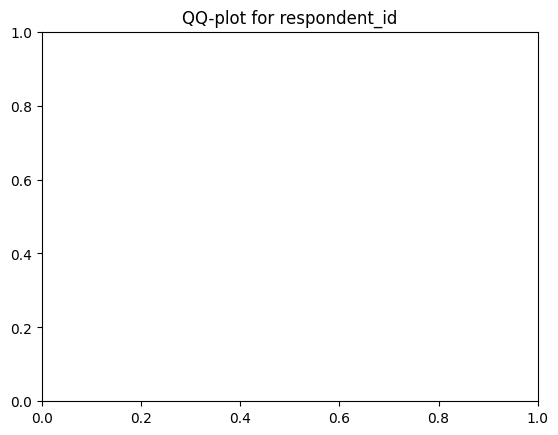

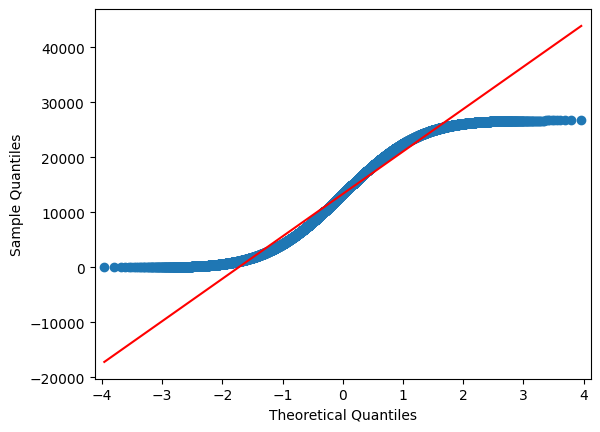

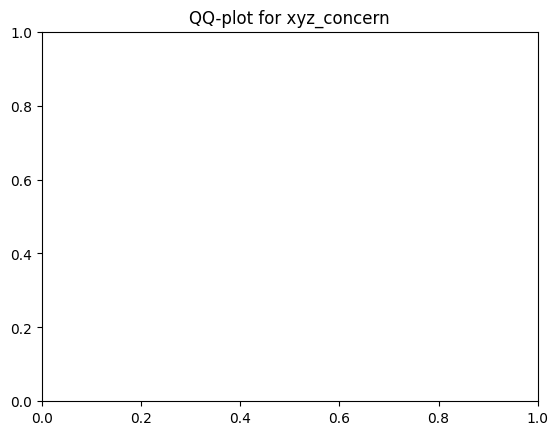

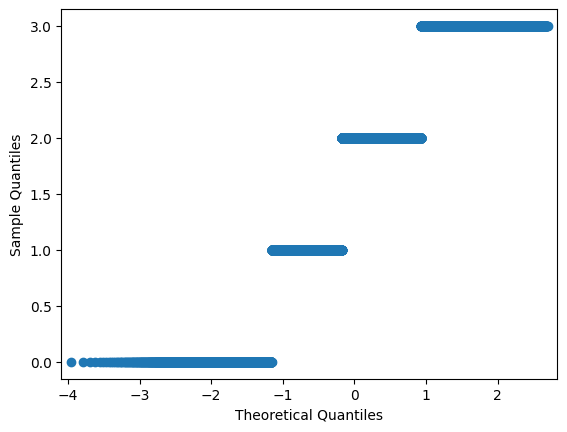

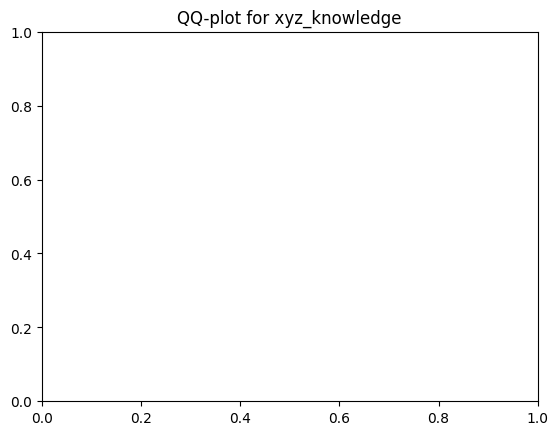

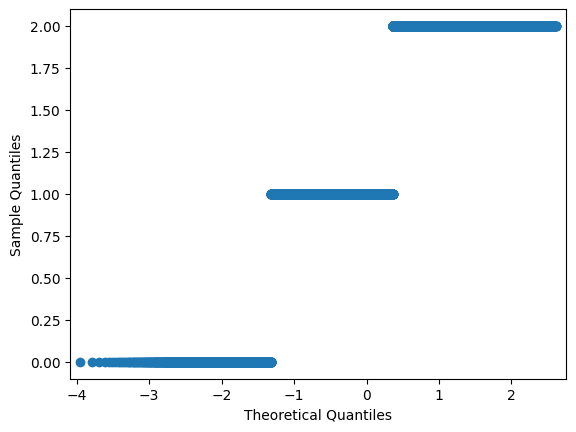

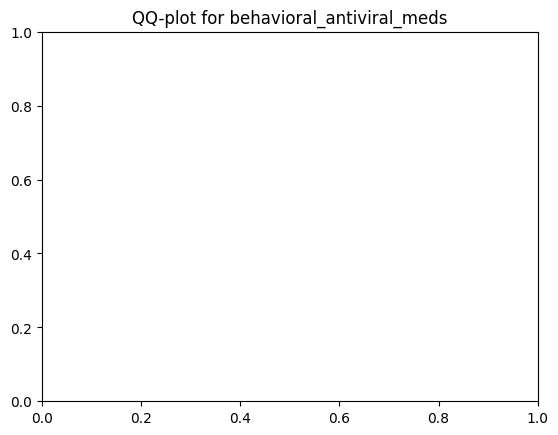

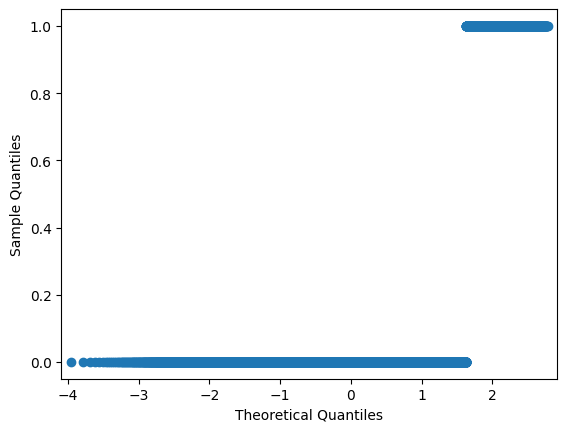

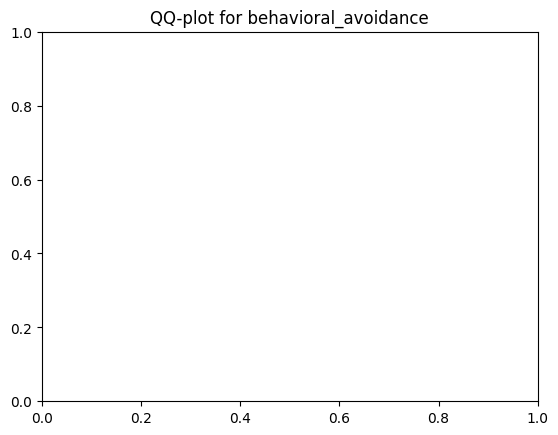

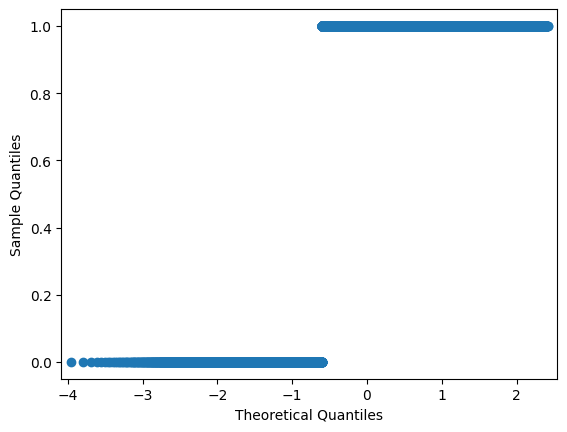

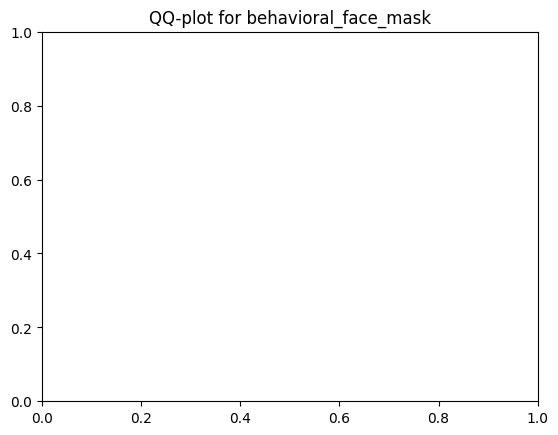

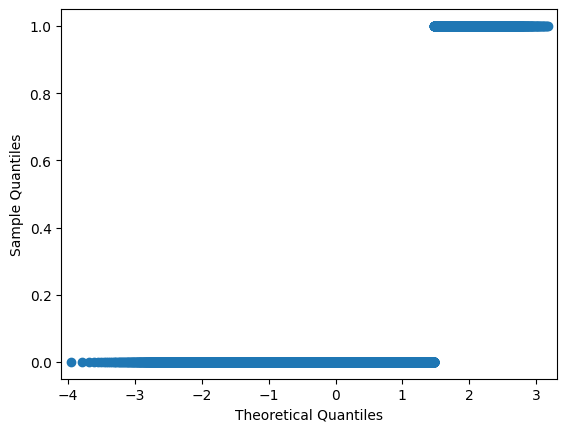

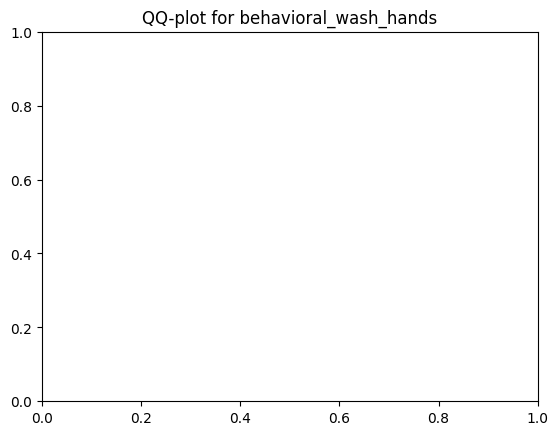

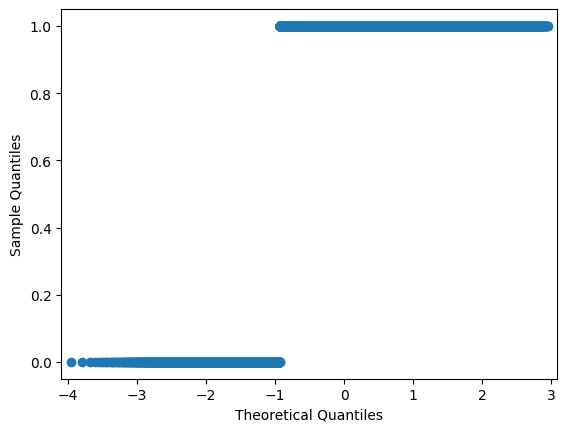

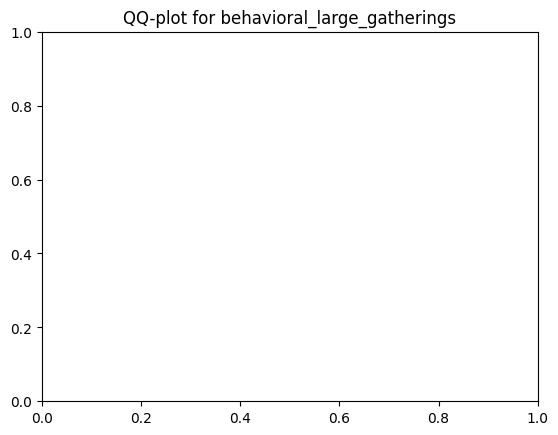

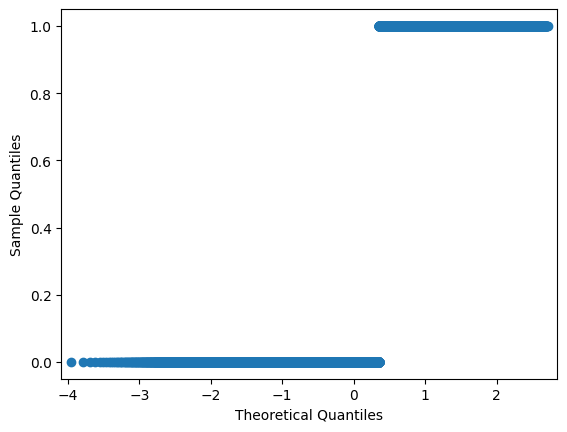

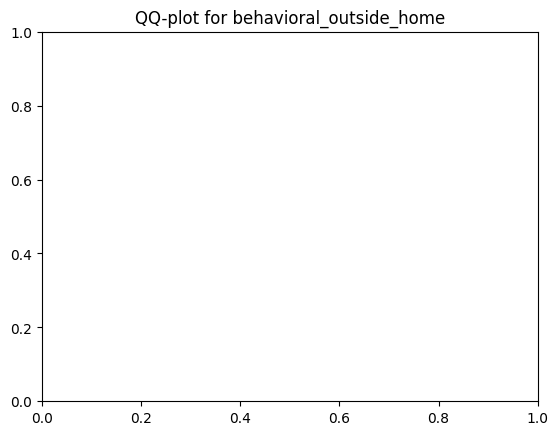

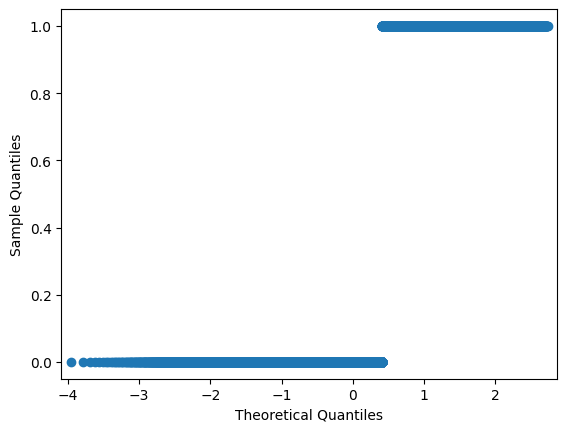

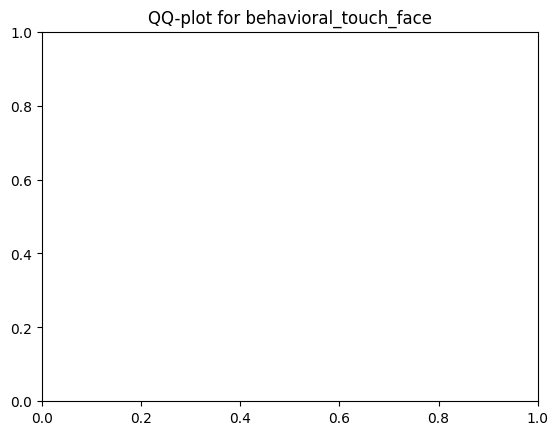

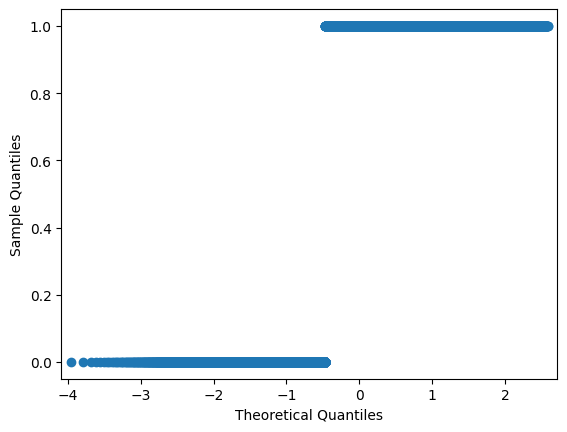

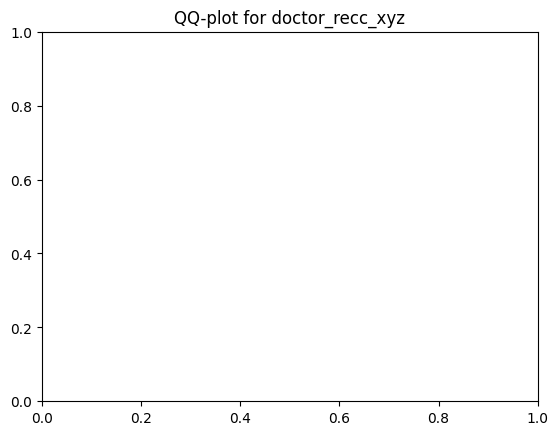

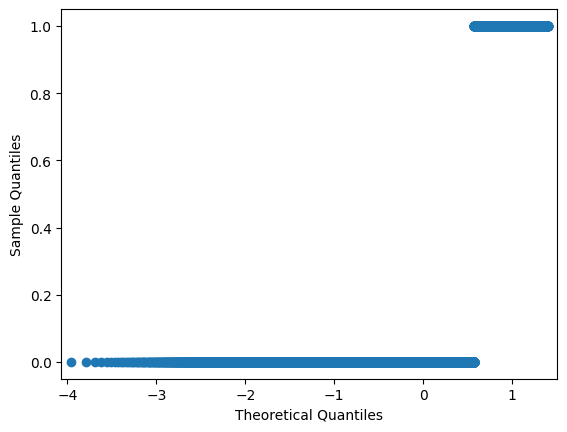

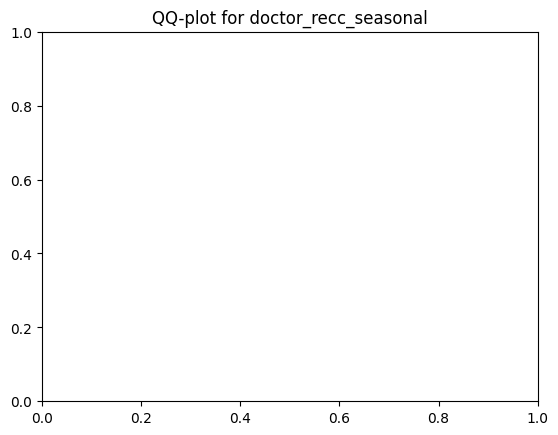

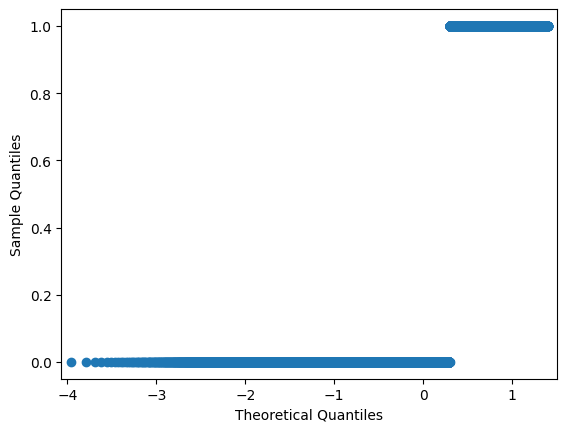

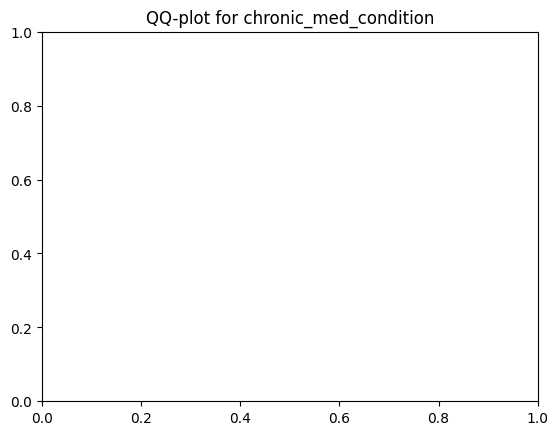

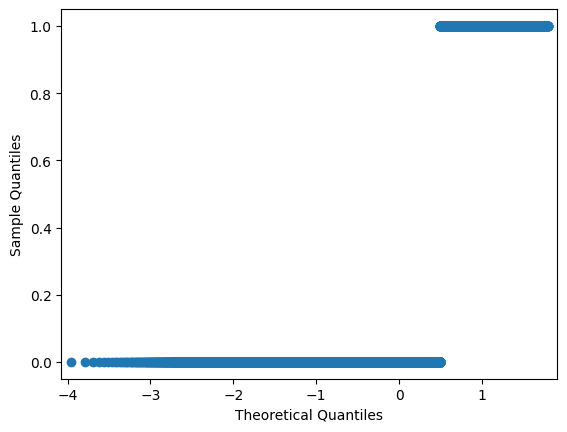

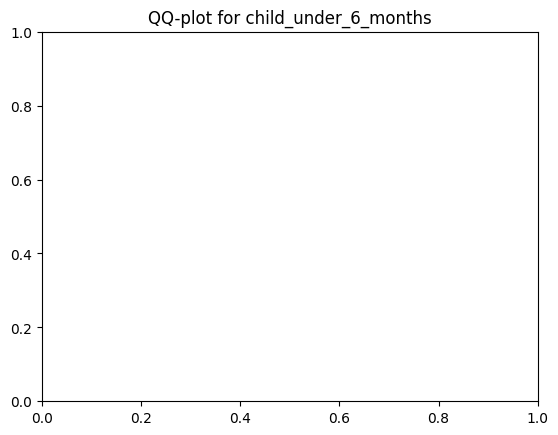

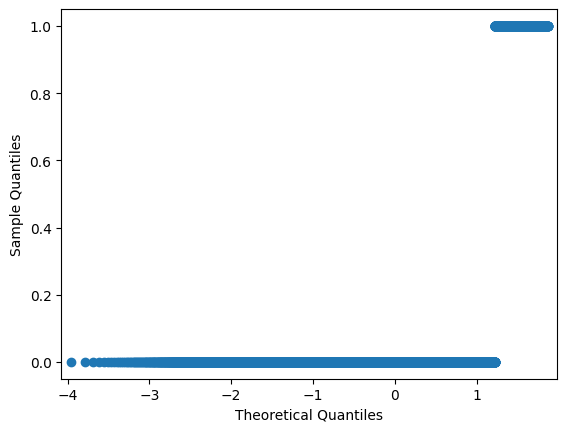

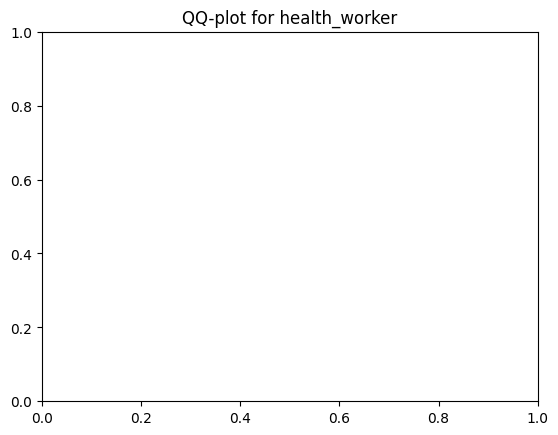

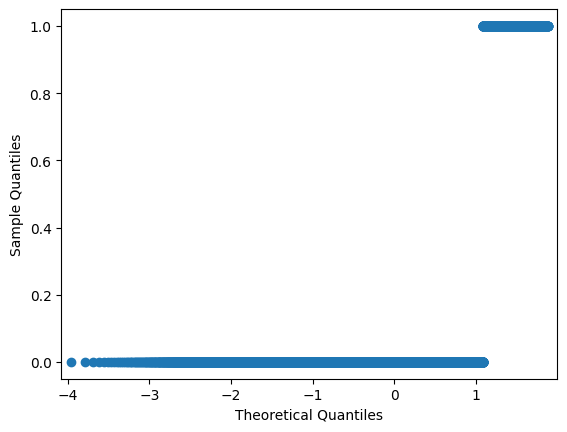

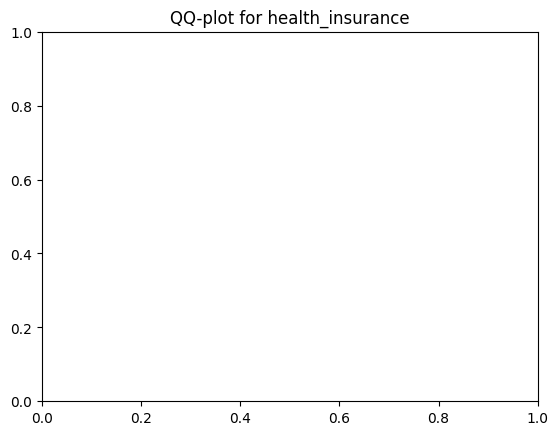

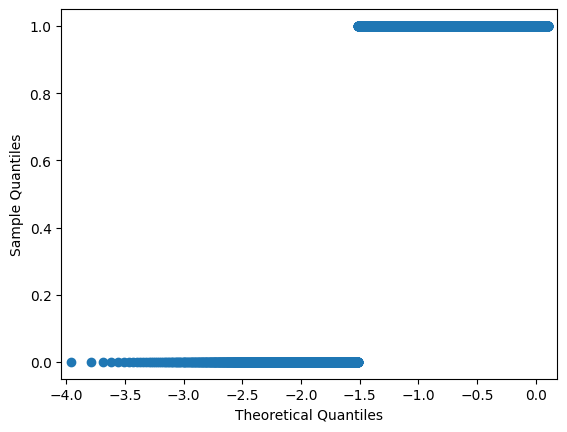

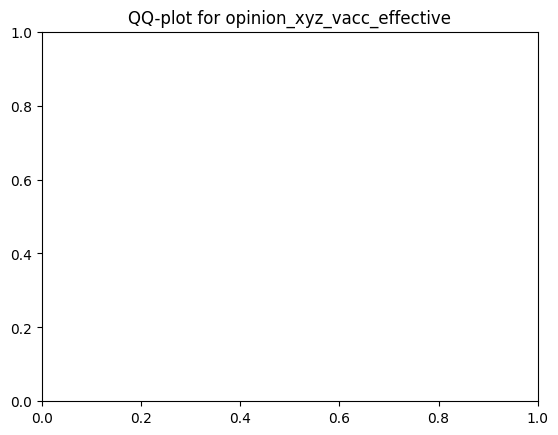

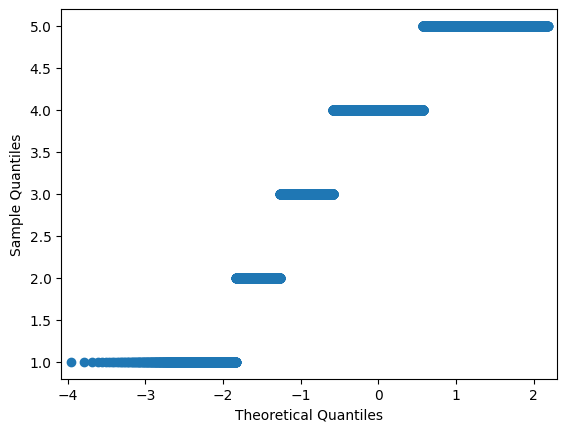

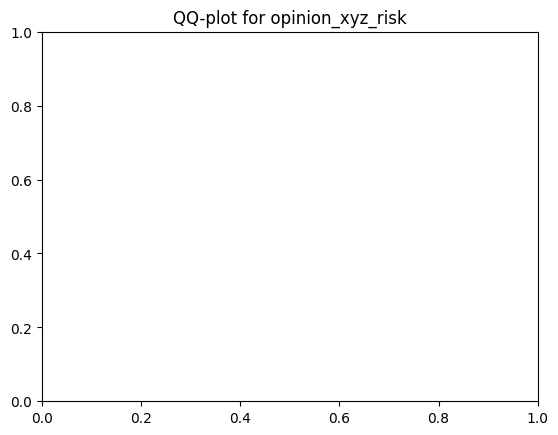

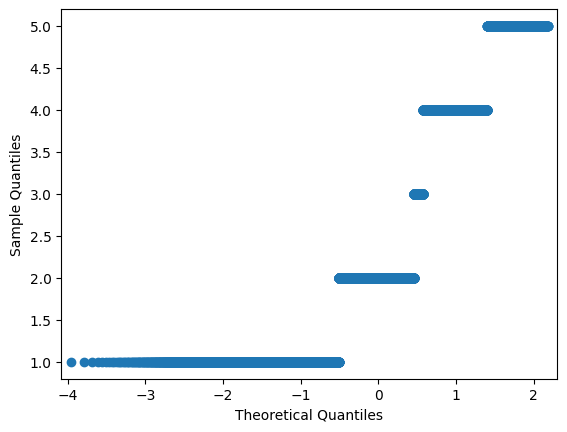

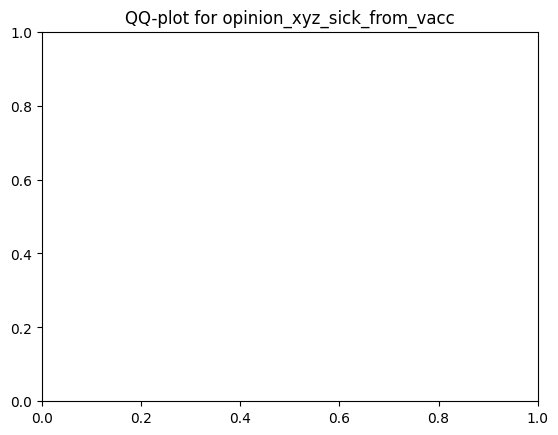

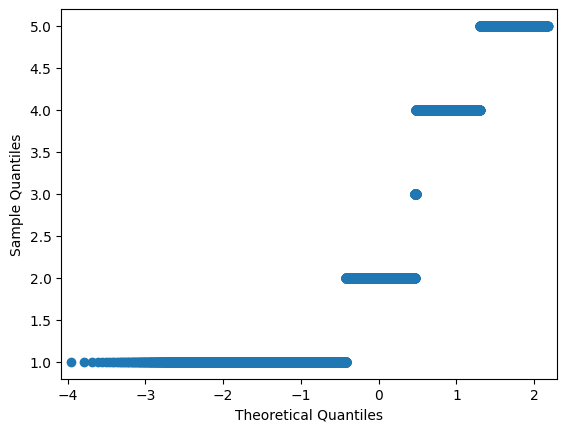

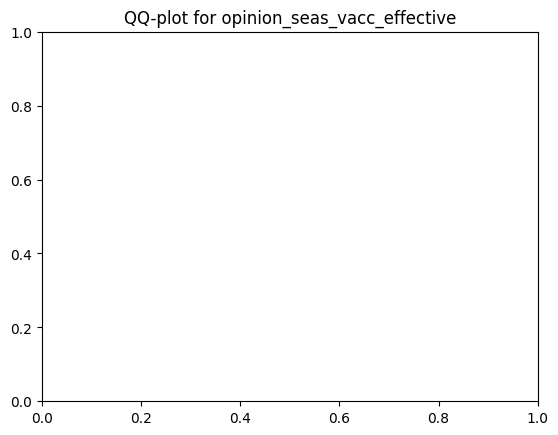

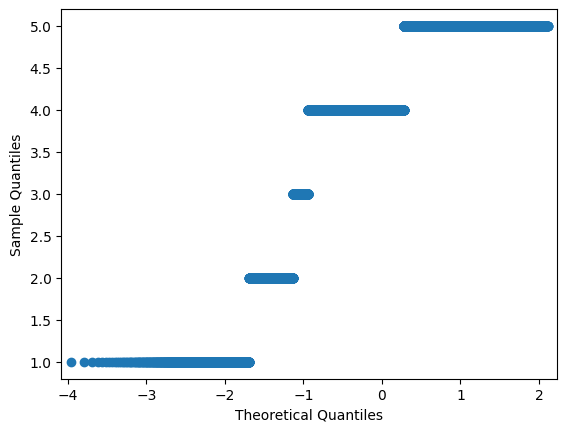

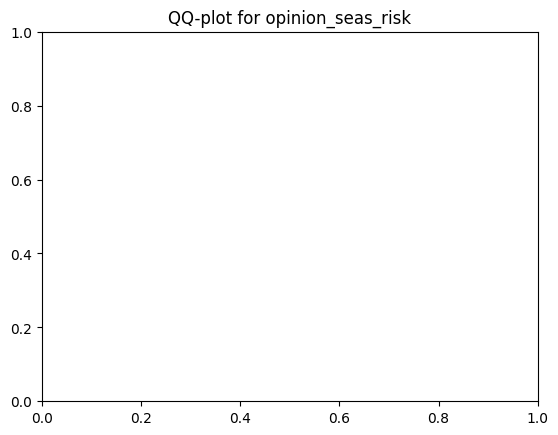

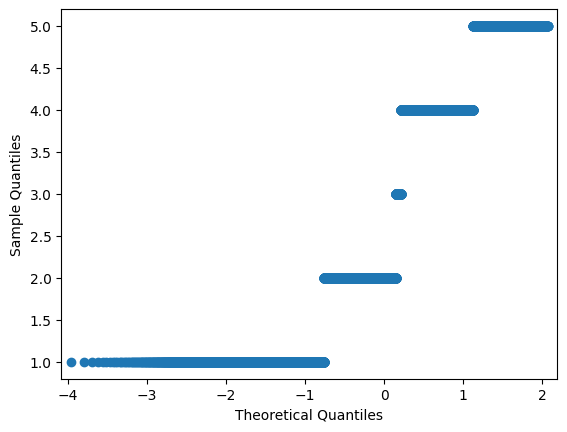

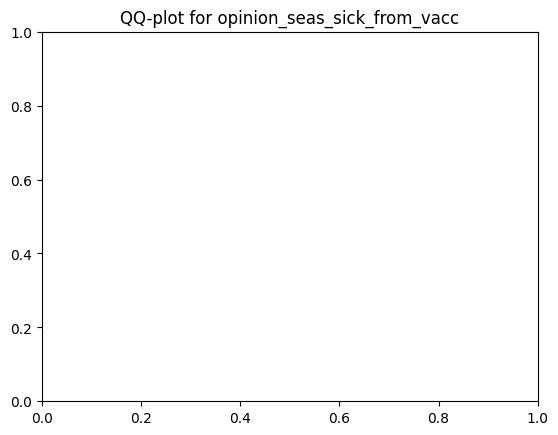

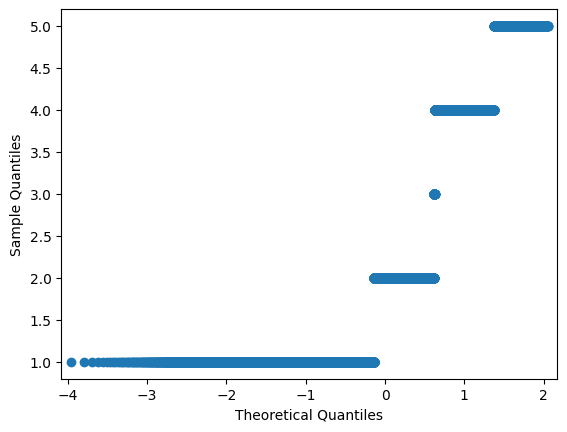

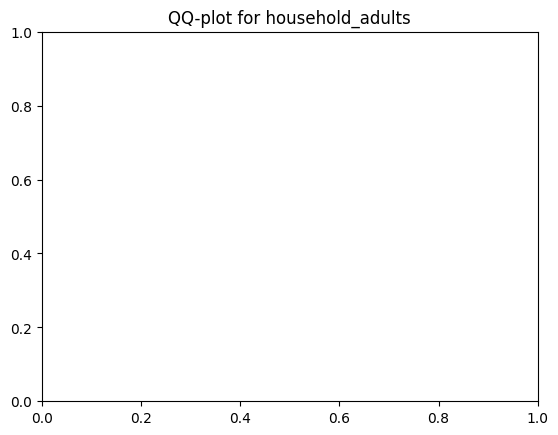

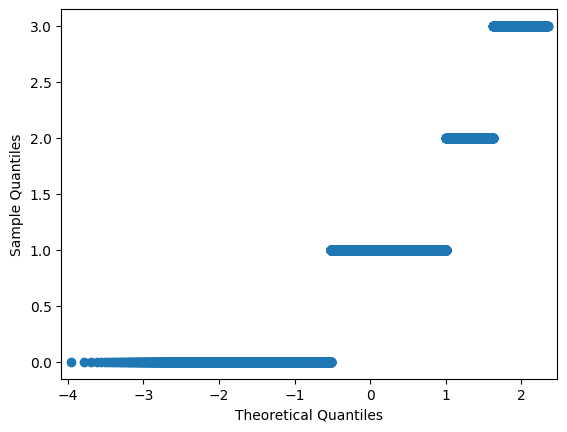

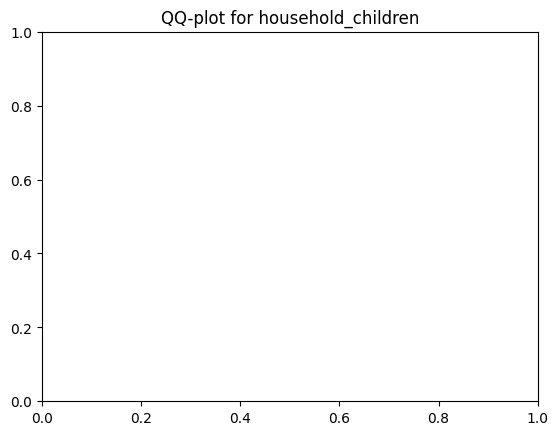

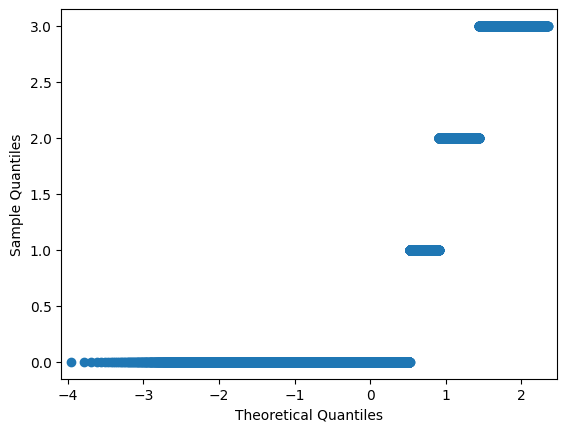

In [51]:
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
  plt.figure()
  plt.title(f'QQ-plot for {col}')
  sm.qqplot(train[col], line='s')
  plt.show()


In [52]:
imputer = SimpleImputer(strategy='most_frequent')
train[cat_cols] = imputer.fit_transform(train[cat_cols])
print(train)

       respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0                  0          1.0            0.0                        0.0   
1                  1          3.0            2.0                        0.0   
2                  2          1.0            1.0                        0.0   
3                  3          1.0            1.0                        0.0   
4                  4          2.0            1.0                        0.0   
...              ...          ...            ...                        ...   
26702          26702          2.0            0.0                        0.0   
26703          26703          1.0            2.0                        0.0   
26704          26704          2.0            2.0                        0.0   
26705          26705          1.0            1.0                        0.0   
26706          26706          0.0            0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  

In [53]:
test[cat_cols] = imputer.fit_transform(test[cat_cols])
print(test)

       respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0              26707          2.0            2.0                        0.0   
1              26708          1.0            1.0                        0.0   
2              26709          2.0            2.0                        0.0   
3              26710          1.0            1.0                        0.0   
4              26711          3.0            1.0                        1.0   
...              ...          ...            ...                        ...   
26703          53410          1.0            1.0                        0.0   
26704          53411          3.0            1.0                        0.0   
26705          53412          0.0            1.0                        0.0   
26706          53413          3.0            1.0                        0.0   
26707          53414          2.0            1.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  

In [54]:
train.isnull().sum()

respondent_id                      0
xyz_concern                        0
xyz_knowledge                      0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_xyz                    0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance                   0
opinion_xyz_vacc_effective         0
opinion_xyz_risk                   0
opinion_xyz_sick_from_vacc         0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [55]:
train['education'].unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan],
      dtype=object)

In [56]:
education_categories = train['education'].unique().tolist()
encoder = OrdinalEncoder(categories=[education_categories])
train['education_encoded'] = encoder.fit_transform(train[['education']])
print(train[['education', 'education_encoded']])

              education  education_encoded
0            < 12 Years                0.0
1              12 Years                1.0
2      College Graduate                2.0
3              12 Years                1.0
4          Some College                3.0
...                 ...                ...
26702      Some College                3.0
26703  College Graduate                2.0
26704      Some College                3.0
26705      Some College                3.0
26706      Some College                3.0

[26707 rows x 2 columns]


In [57]:
train = train.drop('education', axis=1)


In [58]:
test['education_encoded'] = encoder.fit_transform(test[['education']])
print(test[['education', 'education_encoded']])

              education  education_encoded
0      College Graduate                2.0
1              12 Years                1.0
2      College Graduate                2.0
3              12 Years                1.0
4              12 Years                1.0
...                 ...                ...
26703               NaN                NaN
26704          12 Years                1.0
26705      Some College                3.0
26706      Some College                3.0
26707  College Graduate                2.0

[26708 rows x 2 columns]


In [59]:
test = test.drop('education', axis=1)

In [60]:
train['education_encoded'] = imputer.fit_transform(train[['education_encoded']])
test['education_encoded'] = imputer.fit_transform(test[['education_encoded']])

In [61]:
encoder = LabelEncoder()
train['sex_encoded'] = encoder.fit_transform(train['sex'])
test['sex_encoded'] = encoder.fit_transform(test['sex'])


In [62]:
race_cols = ['race']
train = pd.get_dummies(train, columns=race_cols, prefix='race_')
test = pd.get_dummies(test, columns=race_cols, prefix='race_')


In [63]:
age_order = ['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years']
encoder = OrdinalEncoder(categories=[age_order])
train['age_group_encoded'] = encoder.fit_transform(train[['age_group']])
test['age_group_encoded'] = encoder.transform(test[['age_group']])


In [64]:
train['income_poverty'] = imputer.fit_transform(train[['income_poverty']]).flatten()
test['income_poverty'] = imputer.transform(test[['income_poverty']]).flatten()

In [65]:
income_order = ['Below Poverty', '<= $75,000, Above Poverty', '> $75,000']
encoder = OrdinalEncoder(categories=[income_order])
train['income_poverty_encoded'] = encoder.fit_transform(train[['income_poverty']])
test['income_poverty_encoded'] = encoder.fit_transform(test[['income_poverty']])
print("DataFrame after imputation and ordinal encoding:")
print(train[['income_poverty', 'income_poverty_encoded']])

DataFrame after imputation and ordinal encoding:
                  income_poverty  income_poverty_encoded
0                  Below Poverty                     0.0
1                  Below Poverty                     0.0
2      <= $75,000, Above Poverty                     1.0
3                  Below Poverty                     0.0
4      <= $75,000, Above Poverty                     1.0
...                          ...                     ...
26702  <= $75,000, Above Poverty                     1.0
26703  <= $75,000, Above Poverty                     1.0
26704  <= $75,000, Above Poverty                     1.0
26705  <= $75,000, Above Poverty                     1.0
26706  <= $75,000, Above Poverty                     1.0

[26707 rows x 2 columns]


In [66]:
train['marital_status'] = imputer.fit_transform(train[['marital_status']]).flatten()
test['marital_status'] = imputer.transform(test[['marital_status']]).flatten()
encoder = LabelEncoder()

train['marital_status_encoded'] = encoder.fit_transform(train['marital_status'])
test['marital_status_encoded'] = encoder.transform(test['marital_status'])


print("DataFrame after imputation and binary encoding:")
print(train[['marital_status', 'marital_status_encoded']])


imputer = SimpleImputer(strategy='most_frequent')


train['rent_or_own'] = imputer.fit_transform(train[['rent_or_own']]).flatten()
test['rent_or_own'] = imputer.transform(test[['rent_or_own']]).flatten()


encoder = LabelEncoder()


train['rent_or_own_encoded'] = encoder.fit_transform(train['rent_or_own'])
test['rent_or_own_encoded'] = encoder.transform(test['rent_or_own'])


print("DataFrame after imputation and binary encoding:")
print(train[['rent_or_own', 'rent_or_own_encoded']])


DataFrame after imputation and binary encoding:
      marital_status  marital_status_encoded
0        Not Married                       1
1        Not Married                       1
2        Not Married                       1
3        Not Married                       1
4            Married                       0
...              ...                     ...
26702    Not Married                       1
26703    Not Married                       1
26704    Not Married                       1
26705        Married                       0
26706        Married                       0

[26707 rows x 2 columns]
DataFrame after imputation and binary encoding:
      rent_or_own  rent_or_own_encoded
0             Own                    0
1            Rent                    1
2             Own                    0
3            Rent                    1
4             Own                    0
...           ...                  ...
26702         Own                    0
26703        Rent         

In [67]:
census_msa_cols = ['census_msa']

train = pd.get_dummies(train, columns=census_msa_cols, prefix='census_msa_')

test = pd.get_dummies(test, columns=census_msa_cols, prefix='census_msa_')



In [68]:
train['employment_status'] = imputer.fit_transform(train[['employment_status']]).flatten()
test['employment_status'] = imputer.transform(test[['employment_status']]).flatten()

train = pd.get_dummies(train, columns=['employment_status'], prefix='employment_status_')

test = pd.get_dummies(test, columns=['employment_status'], prefix='employment_status_')


In [69]:
train['household_adults'] = imputer.fit_transform(train[['household_adults']]).flatten()
test['household_adults'] = imputer.transform(test[['household_adults']]).flatten()
train['household_children'] = imputer.fit_transform(train[['household_children']]).flatten()
test['household_children'] = imputer.transform(test[['household_children']]).flatten()


In [70]:
hhs_geo_region_cols = ['hhs_geo_region']

train = pd.get_dummies(train, columns=hhs_geo_region_cols, prefix='hhs_geo_region_')

test = pd.get_dummies(test, columns=hhs_geo_region_cols, prefix='hhs_geo_region_')


In [71]:
train = train.drop('employment_industry', axis=1)
train = train.drop('employment_occupation', axis=1)

test = test.drop('employment_industry', axis=1)
test = test.drop('employment_occupation', axis=1)


In [72]:
labels

respondent_id  xyz_vaccine  seasonal_vaccine
0                  0            0                 0
1                  1            0                 1
2                  2            0                 0
3                  3            0                 1
4                  4            0                 0
...              ...          ...               ...
26702          26702            0                 0
26703          26703            0                 0
26704          26704            0                 1
26705          26705            0                 0
26706          26706            0                 0

[26707 rows x 3 columns]

In [73]:
train = pd.concat([train, labels], axis=1)
train

respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0                  0          1.0            0.0                        0.0   
1                  1          3.0            2.0                        0.0   
2                  2          1.0            1.0                        0.0   
3                  3          1.0            1.0                        0.0   
4                  4          2.0            1.0                        0.0   
...              ...          ...            ...                        ...   
26702          26702          2.0            0.0                        0.0   
26703          26703          1.0            2.0                        0.0   
26704          26704          2.0            2.0                        0.0   
26705          26705          1.0            1.0                        0.0   
26706          26706          0.0            0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       0.0                   0.0                    0.0   
1                       1.0                   0.0                    1.0   
2                       1.0                   0.0                    0.0   
3                       1.0                   0.0                    1.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      0.0   
3                              1.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  ...  hhs_geo_region__fpwskwrf  \
0                        1.0  ...                     False   
1                        1.0  ...                     False   
2                        0.0  ...                     False   
3                        0.0  ...                     False   
4                        1.0  ...                     False   
...                      ...  ...                       ...   
26702                    0.0  ...                     False   
26703                    0.0  ...                     False   
26704                    1.0  ...                     False   
26705                    1.0  ...                     False   
26706                    0.0  ...                     False   

       hhs_geo_region__kbazzjca  hhs_geo_region__lrircsnp  \
0                         False                     False   
1                         False                     False   
2                         False                     False   
3                         False                      True   
4                         False                     False   
...                         ...                       ...   
26702                     False                     False   
26703                     False                     False   
26704                     False                     False   
26705                

In [74]:
for col in train.filter(like='hhs_geo_region_'):
  train[col] = train[col].astype(int)


In [75]:
train


respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0                  0          1.0            0.0                        0.0   
1                  1          3.0            2.0                        0.0   
2                  2          1.0            1.0                        0.0   
3                  3          1.0            1.0                        0.0   
4                  4          2.0            1.0                        0.0   
...              ...          ...            ...                        ...   
26702          26702          2.0            0.0                        0.0   
26703          26703          1.0            2.0                        0.0   
26704          26704          2.0            2.0                        0.0   
26705          26705          1.0            1.0                        0.0   
26706          26706          0.0            0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       0.0                   0.0                    0.0   
1                       1.0                   0.0                    1.0   
2                       1.0                   0.0                    0.0   
3                       1.0                   0.0                    1.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      0.0   
3                              1.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  ...  hhs_geo_region__fpwskwrf  \
0                        1.0  ...                         0   
1                        1.0  ...                         0   
2                        0.0  ...                         0   
3                        0.0  ...                         0   
4                        1.0  ...                         0   
...                      ...  ...                       ...   
26702                    0.0  ...                         0   
26703                    0.0  ...                         0   
26704                    1.0  ...                         0   
26705                    1.0  ...                         0   
26706                    0.0  ...                         0   

       hhs_geo_region__kbazzjca  hhs_geo_region__lrircsnp  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         1   
4                             0                         0   
...                         ...                       ...   
26702                         0                         0   
26703                         0                         0   
26704                         0                         0   
26705                

In [76]:
for col in test.filter(like='hhs_geo_region_'):
  test[col] = test[col].astype(int)


In [77]:
train = train.drop(columns = ['age_group', 'sex'], axis=1)


In [78]:
train = train.drop(columns = ['income_poverty', 'marital_status', 'rent_or_own'], axis=1)
train

respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0                  0          1.0            0.0                        0.0   
1                  1          3.0            2.0                        0.0   
2                  2          1.0            1.0                        0.0   
3                  3          1.0            1.0                        0.0   
4                  4          2.0            1.0                        0.0   
...              ...          ...            ...                        ...   
26702          26702          2.0            0.0                        0.0   
26703          26703          1.0            2.0                        0.0   
26704          26704          2.0            2.0                        0.0   
26705          26705          1.0            1.0                        0.0   
26706          26706          0.0            0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       0.0                   0.0                    0.0   
1                       1.0                   0.0                    1.0   
2                       1.0                   0.0                    0.0   
3                       1.0                   0.0                    1.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      0.0   
3                              1.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  ...  hhs_geo_region__fpwskwrf  \
0                        1.0  ...                         0   
1                        1.0  ...                         0   
2                        0.0  ...                         0   
3                        0.0  ...                         0   
4                        1.0  ...                         0   
...                      ...  ...                       ...   
26702                    0.0  ...                         0   
26703                    0.0  ...                         0   
26704                    1.0  ...                         0   
26705                    1.0  ...                         0   
26706                    0.0  ...                         0   

       hhs_geo_region__kbazzjca  hhs_geo_region__lrircsnp  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         1   
4                             0                         0   
...                         ...                       ...   
26702                         0                         0   
26703                         0                         0   
26704                         0                         0   
26705                

In [79]:
test = test.drop(columns = ['age_group', 'sex'], axis=1)

In [80]:
id = test['respondent_id']

In [81]:
test = test.drop(columns = ['income_poverty', 'marital_status', 'rent_or_own'], axis=1)

In [82]:
test = test.drop(columns = 'respondent_id')

In [83]:
test.columns

Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'education_encoded', 'sex_encoded', 'race__Black',
       'race__Hispanic', 'race__Other or Multiple', 'race__White',
       'age_group_encoded', 'income_poverty_encoded', 'marital_status_encoded',
       'rent_or_own_encoded', 'census_msa__MSA, Not Principle  City',
       'census_msa__MSA, Principle City', 'census_msa__Non-MSA',
       'employment_status__Employed', 'employment_sta

In [84]:
train = pd.concat([train, train.iloc[[-1]]], ignore_index=True) # Use concat instead of append

In [85]:
train.shape

(26708, 53)

In [86]:
test.shape

(26708, 49)

In [87]:
X = train.drop(columns=['respondent_id', 'xyz_vaccine', 'seasonal_vaccine'])
y = train[['xyz_vaccine', 'seasonal_vaccine']]

In [88]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
normalizer.fit(X)
X = normalizer.transform(X)
test = normalizer.transform(test)


In [89]:
y_train_xyz = y['xyz_vaccine']
svm_model_xyz = SVC(probability=True, random_state=42)
svm_model_xyz.fit(X, y_train_xyz)

y_train_seasonal = y['seasonal_vaccine']
svm_model_seasonal = SVC(probability=True, random_state=42)
svm_model_seasonal.fit(X, y_train_seasonal)

SVC(probability=True, random_state=42)

In [90]:
y_pred_proba_xyz = svm_model_xyz.predict_proba(test)
y_pred_proba_seasonal = svm_model_seasonal.predict_proba(test)

In [91]:
y_pred_proba_xyz_0 = y_pred_proba_xyz[:, 0]  # Probability of not getting the XYZ vaccine
y_pred_proba_xyz_1 = y_pred_proba_xyz[:, 1]  # Probability of getting the XYZ vaccine

y_pred_proba_seasonal_0 = y_pred_proba_seasonal[:, 0]  # Probability of not getting the seasonal vaccine
y_pred_proba_seasonal_1 = y_pred_proba_seasonal[:, 1]  # Probability of getting the seasonal vaccine


In [92]:
print("Shape of y_train_xyz_1:", y_train_xyz.shape)
print("Shape of y_pred_proba_xyz_1:", y_pred_proba_xyz_1.shape)


Shape of y_train_xyz_1: (26708,)
Shape of y_pred_proba_xyz_1: (26708,)


In [93]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model_xyz.fit(X_train, y_train['xyz_vaccine'])

y_pred_proba_xyz = svm_model_xyz.predict_proba(X_val)

y_pred_proba_xyz_0 = y_pred_proba_xyz[:, 0]  # Probability of not getting the XYZ vaccine
y_pred_proba_xyz_1 = y_pred_proba_xyz[:, 1]  # Probability of getting the XYZ vaccine

auc_xyz = roc_auc_score(y_val['xyz_vaccine'], y_pred_proba_xyz_1)
print("AUC score for XYZ vaccine:", auc_xyz)

svm_model_seasonal.fit(X_train, y_train['seasonal_vaccine'])
y_pred_proba_seasonal = svm_model_seasonal.predict_proba(X_val)
y_pred_proba_seasonal_0 = y_pred_proba_seasonal[:, 0]
y_pred_proba_seasonal_1 = y_pred_proba_seasonal[:, 1]
auc_seasonal = roc_auc_score(y_val['seasonal_vaccine'], y_pred_proba_seasonal_1)
print("AUC score for seasonal vaccine:", auc_seasonal)


AUC score for XYZ vaccine: 0.809911666857864
AUC score for seasonal vaccine: 0.8504040833508202


In [94]:
nb_model = GaussianNB()
nb_model.fit(X, y['xyz_vaccine'])

y_pred_proba_xyz = nb_model.predict_proba(test)

y_pred_proba_xyz_1 = y_pred_proba_xyz[:, 1]

auc_xyz = roc_auc_score(y['xyz_vaccine'], y_pred_proba_xyz_1)
print("AUC score for XYZ vaccine (Naive Bayes):", auc_xyz)

nb_model_seasonal = GaussianNB()
nb_model_seasonal.fit(X, y['seasonal_vaccine'])

y_pred_proba_seasonal = nb_model_seasonal.predict_proba(test)

y_pred_proba_seasonal_1 = y_pred_proba_seasonal[:, 1]

auc_seasonal = roc_auc_score(y['seasonal_vaccine'], y_pred_proba_seasonal_1)
print("AUC score for seasonal vaccine (Naive Bayes):", auc_seasonal)

AUC score for XYZ vaccine (Naive Bayes): 0.5030919190236973
AUC score for seasonal vaccine (Naive Bayes): 0.4989368241796316


In [97]:

nb_model_xyz = GaussianNB()
nb_model_xyz.fit(X_train, y_train['xyz_vaccine'])

y_pred_proba_xyz = nb_model_xyz.predict_proba(X_val)

y_pred_proba_xyz_1 = y_pred_proba_xyz[:, 1]

auc_xyz = roc_auc_score(y_val['xyz_vaccine'], y_pred_proba_xyz_1)
print("AUC score for XYZ vaccine (Naive Bayes):", auc_xyz)

nb_model_seasonal = GaussianNB()
nb_model_seasonal.fit(X_train, y_train['seasonal_vaccine'])

y_pred_proba_seasonal = nb_model_seasonal.predict_proba(X_val)

y_pred_proba_seasonal_1 = y_pred_proba_seasonal[:, 1]

auc_seasonal = roc_auc_score(y_val['seasonal_vaccine'], y_pred_proba_seasonal_1)
print("AUC score for seasonal vaccine (Naive Bayes):", auc_seasonal)


AUC score for XYZ vaccine (Naive Bayes): 0.7721703467541552
AUC score for seasonal vaccine (Naive Bayes): 0.7925979907227536


In [96]:

submission_df = pd.DataFrame({
    'respondent_id': id,
    'xyz_vaccine': y_pred_proba_xyz_1,
    'seasonal_vaccine': y_pred_proba_seasonal_1
})

# Save the DataFrame as a CSV file in Google Drive
submission_df.to_csv('/content/drive/MyDrive/Datahack Hackathon/Datahack Sub 1.csv', index=False)


"\nsubmission_df = pd.DataFrame({\n    'respondent_id': id,\n    'xyz_vaccine': y_pred_proba_xyz_1,\n    'seasonal_vaccine': y_pred_proba_seasonal_1\n})\n\n# Save the DataFrame as a CSV file in Google Drive\nsubmission_df.to_csv('/content/drive/MyDrive/Datahack Hackathon/Datahack Sub 1.csv', index=False)\n"